In [1]:
 # import os
# os.system("pip install --upgrade pip")
# os.system("python3.8 -m pip install --upgrade pip")
# os.system("pip install --extra-index-url=https://pypi.celonis.cloud/ pycelonis --upgrade")
# os.system("pip install pycelonis")

In [2]:
from pycelonis import *
from pycelonis.pql import *

In [3]:
url = "https://academic-if21b054-technikum-wien-at.eu-2.celonis.cloud/"

file = open('./APP_KEY.txt')

api_token = file.read()
file.close()

key_type = "APP_KEY"
celonis = get_celonis(base_url=url, api_token=api_token, key_type=key_type, permissions=False)

[2023-06-03 22:57:09,841] WARNING: Your PyCelonis Version 2.0.3 is outdated (Newest Version: 2.2.0). Please upgrade the package via: pip install --extra-index-url=https://pypi.celonis.cloud/ pycelonis pycelonis_core --upgrade


[2023-06-03 22:57:09,940] INFO: Initial connect successful! PyCelonis Version: 2.0.3


In [4]:
celonis.data_integration.get_data_pools()

[
	DataPool(id='5656d8b6-63fd-41f0-9e10-6183b71028c9', name='datapool-filtered-final-version'),
	DataPool(id='791de0ea-2d8b-43d2-946b-1bc034123683', name='datapool-final-version ')
]

In [5]:
data_pool_id = "5656d8b6-63fd-41f0-9e10-6183b71028c9"
data_pool = celonis.data_integration.get_data_pool(data_pool_id)

In [6]:
data_pool.get_data_models()

[
	DataModel(id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='datamodel-filtered-final-version', pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataModel(id='d4109623-5dcd-41c7-8a46-48d820f5f3bc', name='datamodel-filtered-final-version-backup', pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9')
]

In [7]:
data_model_id = "ad437bad-a13d-4f31-b247-0760c57ae3b0"
data_model = data_pool.get_data_model(data_model_id)

In [8]:
data_model.get_tables()

[
	DataModelTable(id='1fc21380-d3ad-46ef-a780-c7ecd4a317d8', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='ML_results_0', alias='ML_results_0', data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataModelTable(id='20f0e200-475d-40e5-a964-f75a7f401c8c', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='rating', alias=None, data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9'),
	DataModelTable(id='79d54b0f-e39e-4aa3-a35d-592f0bb6abc9', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='activities', alias=None, data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9')
]

In [9]:
activity_table_id = "79d54b0f-e39e-4aa3-a35d-592f0bb6abc9"
activity_table = data_model.get_table(activity_table_id)
activity_table
# activity_table.get_columns()
# dir(activity_table)

DataModelTable(id='79d54b0f-e39e-4aa3-a35d-592f0bb6abc9', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='activities', alias=None, data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9')

In [10]:
ratings_table_id = "043caccb-8ced-4c69-8444-cb0146d3bd2b"
ratings_table = data_model.get_table(activity_table_id)
ratings_table

DataModelTable(id='79d54b0f-e39e-4aa3-a35d-592f0bb6abc9', data_model_id='ad437bad-a13d-4f31-b247-0760c57ae3b0', name='activities', alias=None, data_pool_id='5656d8b6-63fd-41f0-9e10-6183b71028c9')

In [11]:
query = PQL(distinct=False, limit=None, offset=None)
query += PQLColumn(name="Zeit", query=""" "ACTIVITIES"."zeit" """)
query += PQLColumn(name="Vollständiger Name", query=""" "ACTIVITIES"."Vollständiger Name" """)
query += PQLColumn(name="Ereigniskontext - Ereignisname", query=""" "ACTIVITIES"."Ereigniskontext - Ereignisname" """)

activity_df = data_model.export_data_frame(query)
activity_df

[2023-06-03 22:57:10,750] INFO: Successfully created data export with id '3d19d470-4a4a-408c-a9ea-6fc077a2224d'
[2023-06-03 22:57:10,752] INFO: Wait for execution of data export with id '3d19d470-4a4a-408c-a9ea-6fc077a2224d'


0it [00:00, ?it/s]

[2023-06-03 22:57:10,827] INFO: Export result chunks for data export with id '3d19d470-4a4a-408c-a9ea-6fc077a2224d'


,Zeit,Vollständiger Name,Ereigniskontext - Ereignisname
0,2022-09-13 18:48:00,Student1,Test: Quiz 1 - Testversuch gestartet
1,2022-09-13 19:05:00,Student1,Test: Quiz 1 - Testversuch eingereicht
2,2022-09-16 11:47:00,Student1,Test: Quiz 1 - Testversuch gestartet
3,2022-09-16 11:57:00,Student1,Test: Quiz 1 - Testversuch eingereicht
4,2022-09-16 11:57:00,Student1,Test: Quiz 1 - Testversuch gestartet
...,...,...,...
1097,2022-10-19 10:27:00,Student9,Test: Quiz 6 - Testversuch eingereicht
1098,2022-11-07 15:10:00,Student9,Test: Quiz 7 - Testversuch gestartet
1099,2022-11-07 15:31:00,Student9,Test: Quiz 7 - Testversuch eingereicht
1100,2022-11-08 17:51:00,Student9,Test: Exam Attempt 1 - Testversuch gestartet


In [12]:
query = PQL(distinct=False, limit=None, offset=None)
query += PQLColumn(name="Nr", query=""" "RATING"."Nr" """)
query += PQLColumn(name="Test: Quiz 1 (Punkte)", query=""" "RATING"."Test: Quiz 1 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 2 (Punkte)", query=""" "RATING"."Test: Quiz 2 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 3 (Punkte)", query=""" "RATING"."Test: Quiz 3 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 4 (Punkte)", query=""" "RATING"."Test: Quiz 4 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 5 (Punkte)", query=""" "RATING"."Test: Quiz 5 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 6 (Punkte)", query=""" "RATING"."Test: Quiz 6 (Punkte)" """)
query += PQLColumn(name="Test: Quiz 7 (Punkte)", query=""" "RATING"."Test: Quiz 7 (Punkte)" """)
query += PQLColumn(name="Quiz gesamt (Punkte)", query=""" "RATING"."Quiz gesamt (Punkte)" """)
query += PQLColumn(name="Test: Exam Attempt 1 (Punkte)", query=""" "RATING"."Test: Exam Attempt 1 (Punkte)" """)
query += PQLColumn(name="Kurs gesamt (Punkte)", query=""" "RATING"."Kurs gesamt (Punkte)" """)
query += PQLColumn(name="Name", query=""" "RATING"."Name" """)

rating_df = data_model.export_data_frame(query)
rating_df

[2023-06-03 22:57:11,098] INFO: Successfully created data export with id '64c79383-2690-4769-877b-66b6a2dfe8eb'
[2023-06-03 22:57:11,099] INFO: Wait for execution of data export with id '64c79383-2690-4769-877b-66b6a2dfe8eb'


0it [00:00, ?it/s]

[2023-06-03 22:57:13,213] INFO: Export result chunks for data export with id '64c79383-2690-4769-877b-66b6a2dfe8eb'


,Nr,Test: Quiz 1 (Punkte),Test: Quiz 2 (Punkte),Test: Quiz 3 (Punkte),Test: Quiz 4 (Punkte),Test: Quiz 5 (Punkte),Test: Quiz 6 (Punkte),Test: Quiz 7 (Punkte),Quiz gesamt (Punkte),Test: Exam Attempt 1 (Punkte),Kurs gesamt (Punkte),Name
0,0,10.0,11.0,10.0,12.0,8.6,11.0,7.0,46.65,50.0,97.32,Student27
1,1,9.1,10.8,7.7,7.7,0.0,6.1,4.0,30.37,47.5,81.30,Student18
2,3,10.0,11.0,10.0,12.0,13.4,10.5,4.0,46.78,35.0,79.42,Student33
3,4,10.0,11.0,10.0,10.9,13.8,11.0,7.0,49.08,28.0,72.86,Student34
4,5,10.0,11.0,10.0,12.0,14.0,11.0,7.0,50.00,47.5,97.00,Student1
5,6,9.7,11.0,10.0,12.0,14.0,11.0,7.0,49.78,32.0,78.23,Student11
6,7,10.0,11.0,10.0,8.8,0.0,0.0,0.0,25.22,0.0,20.17,Student15
7,8,9.5,11.0,10.0,11.0,13.1,10.7,1.0,43.17,48.0,92.13,Student37
8,9,7.8,9.4,9.1,11.7,10.3,9.0,3.9,40.43,46.7,88.38,Student25
9,10,10.0,11.0,10.0,12.0,14.0,11.0,7.0,50.00,50.0,100.00,Student29


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, balanced_accuracy_score


In [14]:
# read the data
df = rating_df


df = df.drop(["Quiz gesamt (Punkte)",], axis=1)

# extract X,y arrays
quiz_columns = [string for string in df.columns if "Quiz" in string and "gesamt" not in string]
X = df[quiz_columns].astype(float)
y_test = df["Test: Exam Attempt 1 (Punkte)"].astype(float)
y_total = df["Kurs gesamt (Punkte)"].astype(float)
y_pass = y_total.apply(lambda x: 0 if x < 50 else 1)

# scale X
mmSc = MinMaxScaler()
mmSc.fit(X)
X = mmSc.transform(X)
X = pd.DataFrame(X)
y = y_total
"""
# split into train and test
X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(X, y_test, test_size=0.2, shuffle=False)
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, shuffle=False)
collector = []

# perform KNN for k in (1,15)
for k in range(1, 15):
    knn = KNeighborsRegressor(k).fit(X_train, y_train)
    y_predict = knn.predict(X_test)

    collector.append({"k": k,
                      "mea": mean_absolute_error(y_test, y_predict),
                      "rmse": mean_squared_error(y_test, y_predict),
                      "medae": median_absolute_error(y_test, y_predict)
                      })

result = pd.DataFrame(collector)
print(result)
# try to predict X with all 0.0
knn_test = KNeighborsRegressor(5).fit(X_train_test, y_train_test)
knn_total = KNeighborsRegressor(5).fit(X_train_total, y_train_total)
# reg = LinearRegression().fit(X_train, y_train)
x_toPredict = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
predict_zero = knn_test.predict([x_toPredict])
# predict_zero = reg.predict([x_toPredict])
print(predict_zero)
# total_points = knn_total.predict([x_toPredict])
# total_points = sum(x_toPredict) + predict_zero
# print(total_points)

# print(predict_zero >= 30.0)
# predict_zero = 30.0
"""




# found KNeighborsRegressor(k) has lowest error with k=2 and LeaveOneOut
# found KNeighborsClassifier(k) has lowest error with k=5 and LeaveOneOut

errors = []
collector_mae = []
collector_rmse = []
for k in range(1,30):
    collector = []
    # use leave one out, because dataset is so small
    loo = LeaveOneOut()

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        knn = KNeighborsRegressor(k).fit(X_train, y_train)
        
        y_hat = knn.predict(X_test)
        
        collector.append(y_hat[0])
        
          
    y_pred = np.array(collector)   
    
    errors.append({'k': k,
                  'mae': mean_absolute_error(y, y_pred),
                  'rmse': mean_squared_error(y, y_pred, squared=False)})
    
    
error_df = pd.DataFrame(errors).round(3)
mae_knn_reg = error_df['mae'].iloc[error_df['mae'].idxmin()]
rmse_knn_reg = error_df['rmse'].iloc[error_df['rmse'].idxmin()]

y = y_pass
errors = []
collector_acc = []
collector_bacc = []
for k in range(1,30):
    collector = []
    # use leave one out, because dataset is so small
    loo = LeaveOneOut()

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        knn = KNeighborsClassifier(k).fit(X_train, y_train)
        
        y_hat = knn.predict(X_test)
        collector.append(y_hat[0])
        
          
    y_pred = np.array(collector)   
    
    errors.append({"k": k,
                       "acc": accuracy_score(y, y_pred),
                       "bacc": balanced_accuracy_score(y, y_pred)})

error_df = pd.DataFrame(errors).round(3)              
acc_knn_clas = error_df['acc'].iloc[error_df['acc'].idxmax()]
bacc_knn_clas = error_df['bacc'].iloc[error_df['bacc'].idxmax()]


print("MAE: ", mae_knn_reg)
print("RMSE: ", rmse_knn_reg)
print("ACC: ", acc_knn_clas)
print("BACC: ", bacc_knn_clas)


MAE:  13.554
RMSE:  18.166
ACC:  0.967
BACC:  0.981


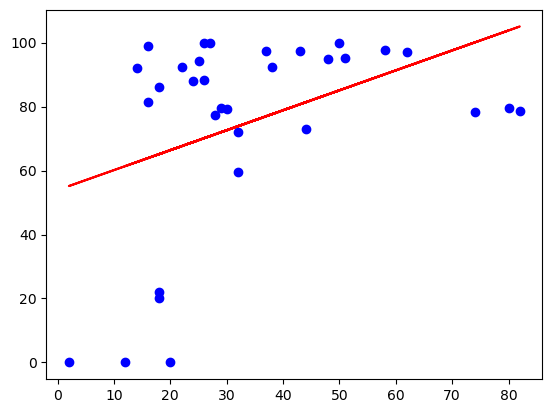

In [15]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)
df = activity_df
"""
dfs = {}
for name in activity_df['Vollständiger Name'].unique():
    dfs[name] = activity_df[activity_df['Vollständiger Name'] == name].reset_index(drop=True)
dfs['Student2']
"""
name_counts = df.groupby('Vollständiger Name').size().reset_index(name='activity_count')
activity_count_df = pd.DataFrame({'name': name_counts['Vollständiger Name'], 'activity_count': name_counts['activity_count']})
rating_name_df = rating_df[['Kurs gesamt (Punkte)', 'Name']].copy()
activity_count_df.rename(columns={'Vollständiger Name': 'Name'}, inplace=True)
rating_name_df.rename(columns={'Name': 'name'}, inplace=True)
merged = pd.merge(activity_count_df, rating_name_df, on='name', how='left')
merged.fillna(0.0, inplace=True)
X = np.array(merged['activity_count']).reshape(-1, 1)
y = merged['Kurs gesamt (Punkte)']
reg = LinearRegression().fit(X, y)
y_hat = reg.predict(X)
plt.scatter(X, y, color='blue', marker='o', label='True Points')
# plt.scatter(X, y_hat, color='red', marker='x', label='Predicted Points')
plt.plot(X, y_hat, color="red")
activity_predict_zero_total = reg.predict([[0.0]])
activity_predict_zero_total = activity_predict_zero_total[0]

In [16]:
df = rating_df
# extract X,y arrays
quiz_columns = [string for string in df.columns if "Quiz" in string and "gesamt" not in string]
X = df[quiz_columns].astype(float)
y_test = df["Test: Exam Attempt 1 (Punkte)"].astype(float)
y_total = df["Kurs gesamt (Punkte)"].astype(float)
y_pass = y_total.apply(lambda x: 0 if x < 50 else 1)

mmSc = MinMaxScaler()
mmSc.fit(X)
X = mmSc.transform(X)
X = pd.DataFrame(X)
y = y_total

"""
tree_reg = DecisionTreeRegressor(max_depth=10)
tree_reg.fit(X, y)
y_pred = tree_reg.predict(X)
      
x_toPredict = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
print(tree_reg.predict([x_toPredict]))
perfect_score = [[10.0, 11.0, 10.0, 12.0, 14.0, 11.0, 7.0]]
x_toPredict = mmSc.transform(np.array(perfect_score).reshape(-1, 7))
x_toPredict = [[1,1,1,1,1,1,1]]
print(x_toPredict)
print(tree_reg.predict(x_toPredict))
print(mean_squared_error(np.array(y), y))

"""

"""
collector = []
# use leave one out, because dataset is so small
loo = LeaveOneOut()

for train_idx, test_idx in loo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    tree_reg.fit(X_train, y_train)
    
    y_hat = tree_reg.predict(X_test)
    collector.append(y_hat[0])
    
y_pred = np.array(collector)    

mae_tree = mean_absolute_error(y, y_pred)
rmse_tree = mean_squared_error(y, y_pred, squared=False)
"""

# found DecisionTreeRegressor(max_depth=k), k varies, low and high

errors = []
for i in range(2):
    collector_reg = []
    collector_clf = []
    collector_proba = []
    # use leave one out, because dataset is so small
    loo = LeaveOneOut()

    for train_idx, test_idx in loo.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y_pass.iloc[train_idx], y_pass.iloc[test_idx]
        
        tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
        y_hat_reg = tree_reg.predict(X_test)
        collector_reg.append(y_hat_reg[0])
      
        tree_clf = DecisionTreeClassifier().fit(X_train, y_train)
        y_hat_clf = tree_clf.predict(X_test)
        collector_clf.append(y_hat_clf[0])
        collector_proba.append(tree_clf.predict_proba(X_test)[0][1])
        
    y_pred_reg = np.array(collector_reg) 
    y_pred_clf = np.array(collector_clf)
    y_pred_clf_proba = np.array(collector_proba)
    
    errors.append({'idx': i,
                  'mae': mean_absolute_error(y, y_pred_reg),
                  'rmse': mean_squared_error(y, y_pred_reg, squared=False),
                  'acc': accuracy_score(y_pass, y_pred_clf),
                  'bacc': balanced_accuracy_score(y_pass, y_pred_clf),
                  'y_pred_clf_proba': y_pred_clf_proba
                  })
    
error_df = pd.DataFrame(errors).round(3)

mae_tree_reg = error_df['mae'].iloc[error_df['mae'].idxmin()]
rmse_tree_reg = error_df['rmse'].iloc[error_df['rmse'].idxmin()]
acc_tree_clf = error_df['acc'].iloc[error_df['acc'].idxmax()]
bacc_tree_clf = error_df['bacc'].iloc[error_df['bacc'].idxmax()]
y_pred_clf_proba = error_df['y_pred_clf_proba'].iloc[error_df['acc'].idxmax()]

print("Regression - MAE: ", mae_tree_reg)
print("Regression - RMSE: ", rmse_tree_reg)
print("Classification - ACC: ", acc_tree_clf)
print("Classification - BACC: ", bacc_tree_clf)
print("Classification - y_pred_clf_proba: ", y_pred_clf_proba)

Regression - MAE:  79.493
Regression - RMSE:  83.087
Classification - ACC:  0.967
Classification - BACC:  0.981
Classification - y_pred_clf_proba:  [1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1.]


In [17]:
print("KNN_REG MAE: ", mae_knn_reg)
print("KNN_REG RMSE: ", rmse_knn_reg)
print("")
print("TREE_REG MAE: ", mae_tree_reg)
print("TREE_REG RMSE: ", rmse_tree_reg)
print("")
print("KNN_CLAS ACC: ", acc_knn_clas)
print("KNN_CLAS BACC: ", bacc_knn_clas)
print("")
print("TREE_CLAS ACC: ", acc_knn_clas)
print("TREE_CLAS BACC: ", bacc_knn_clas)


KNN_REG MAE:  13.554
KNN_REG RMSE:  18.166

TREE_REG MAE:  79.493
TREE_REG RMSE:  83.087

KNN_CLAS ACC:  0.967
KNN_CLAS BACC:  0.981

TREE_CLAS ACC:  0.967
TREE_CLAS BACC:  0.981


In [18]:
ML_result = pd.DataFrame({"result": predict_zero, "total_points": total_points, "activity_zero": activity_predict_zero_total},  index=[0])
print(ML_result)

NameError: name 'predict_zero' is not defined

In [ ]:
tables = data_model.get_tables()

In [ ]:
data_pool.create_table(df=ML_result, table_name="ML_results_0", drop_if_exists=True, force=True)

In [ ]:
tables.find("ML_results_0").delete()
data_model.add_table(name="ML_results_0", alias="ML_results_0")

In [ ]:
data_pool.get_tables()

In [ ]:
data_model.reload()